<a href="https://colab.research.google.com/github/theresarocha/estudos_machine_learning/blob/main/Fundamentos_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fundamentos de Machine Learning**

Este projeto tem por objetivo prever os custos médicos individuais dos beneficiários de um seguro de saúde. Para isso, será utilizado o tipo  de aprendizado de máquina supervisionado usando um modelo de regressão linear.

In [ ]:
#Importando o dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/theresarocha/estudos_machine_learning/main/dataset/insurance.csv'
dados = pd.read_csv(url)

In [ ]:
#Mostrando as cinco primeiras linhas do dataset
dados.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
#Quantidade de linhas e colunas
dados.shape

(1338, 7)

In [ ]:
#Informações sobre as variáveis do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Neste conjunto de dados, temos 7 variáveis do tipo inteiro, números reais e objeto.

As variáveis deste dataset se classificam em:

- Age (Idade do beneficiário principal): quantitativa discreta
- Sex (Gênero do contratante do seguro): qualitativa nominal
- Bmi (Índice de Massa Corporal): quantitativa contínua
- Children (Quantidade de filhos cobertos pelo seguro): quantitativa discreta
- Smoker (Fumante): qualitativa nominal
- Region (Região residencial do beneficiário): qualitativa nominal
- Charges (Custos médicos individuais): quantitativa contínua

In [ ]:
#Obtendo algumas medidas descritivas das variáveis numéricas
dados.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

A média de idade dos beneficiários deste seguro de saúde é de 39 anos. A pessoa mais nova tem 18 anos e a mais velha tem 64 anos.

A média do IMC dos beneficiários é de 30,66. O menor IMC é de 15,96 e o maior é de 53,13. De acordo com a OMS, um indivíduo com peso normal tem um IMC entre 18,5 e 24,9.

Os beneficiários têm, em média, 1 filho e no máximo 5 filhos.

Os custos médicos individuais dos beneficiários são, em média, de 13270,42 dólares, sendo o custo máximo de 63770,43 dólares e custo mínimo de 1121,87 dólares.

##**Visualização de Dados**

O Python possui a biblioteca de código aberto chamada Sweetviz, a qual permite fazer uma análise exploratória dos dados de forma rápida, além de comparar conjunto de dados e fazer inferências a partir deles.

In [ ]:
#Instalando a bibloteca sweetviz
#O ! indica que o código irá rodar em um ambiente de instalação
!pip install sweetviz

     |████████████████████████████████| 15.1MB 158kB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
#Importando a biblioteca sweetviz
import sweetviz as sv

Aqui, vamos criar uma função para visualizar os dados em relação a variável custos.

In [ ]:
#Criando a função utilizando o método analyze
#source são os dados
#target_feat é a variável alvo (custos)

eda = sv.analyze(source = dados, target_feat = 'charges')

                                             |          | [  0%]   00:00 -> (? left)


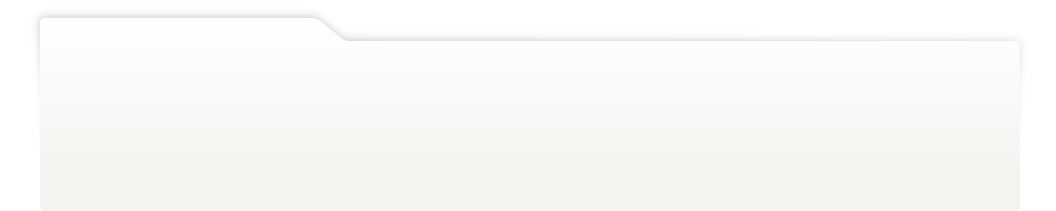
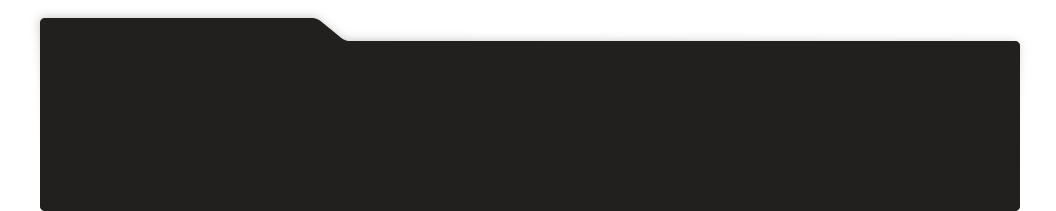
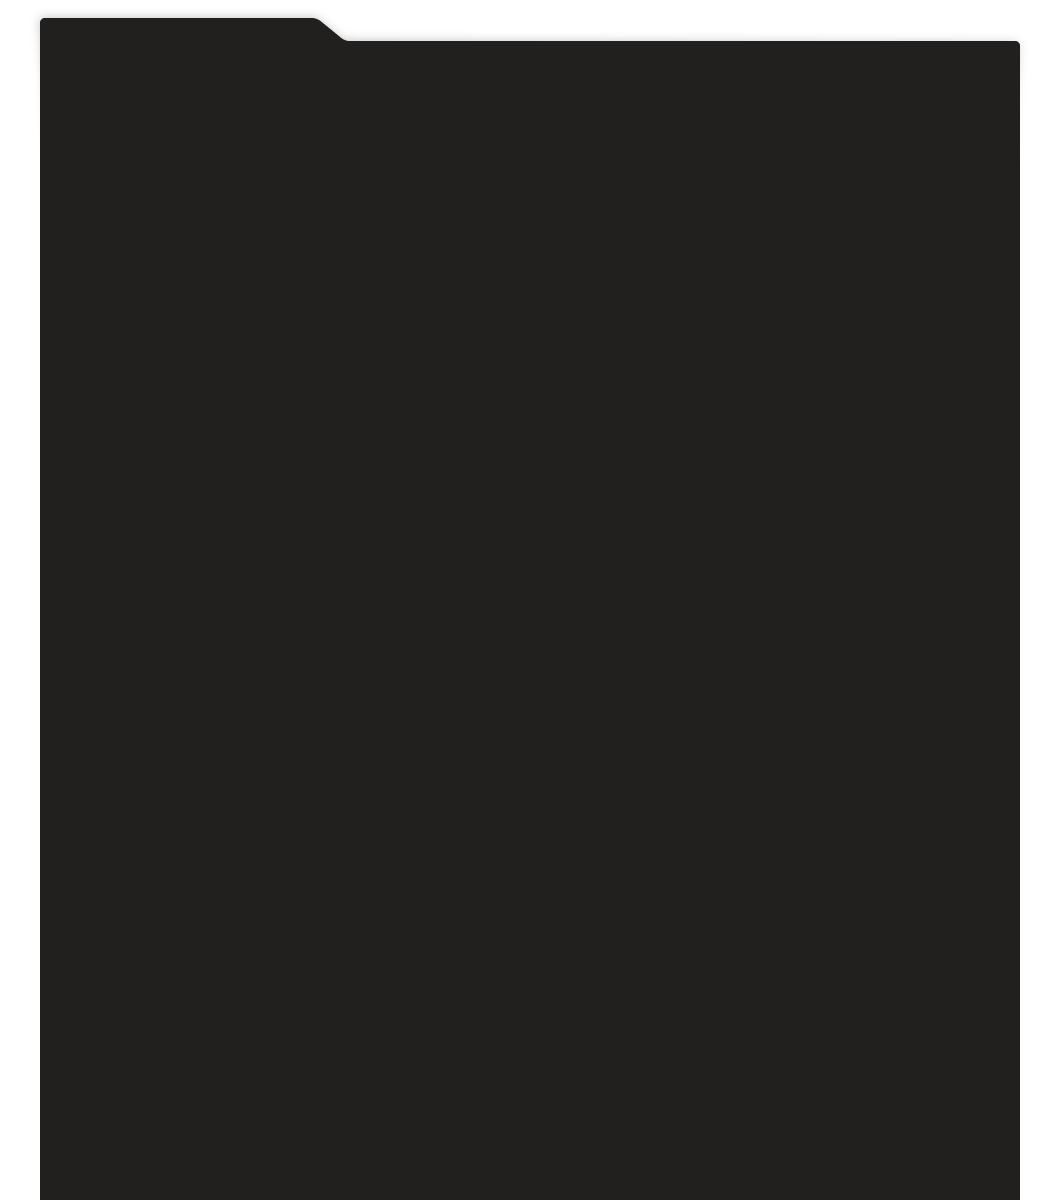
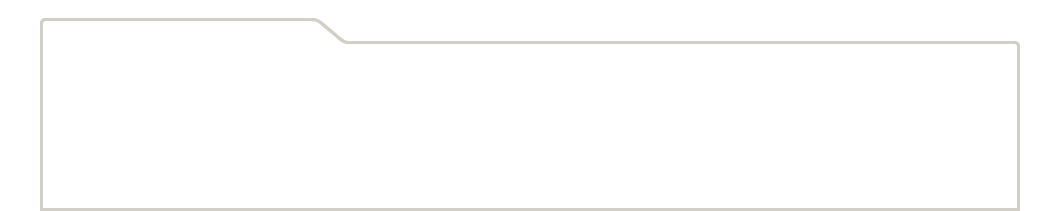
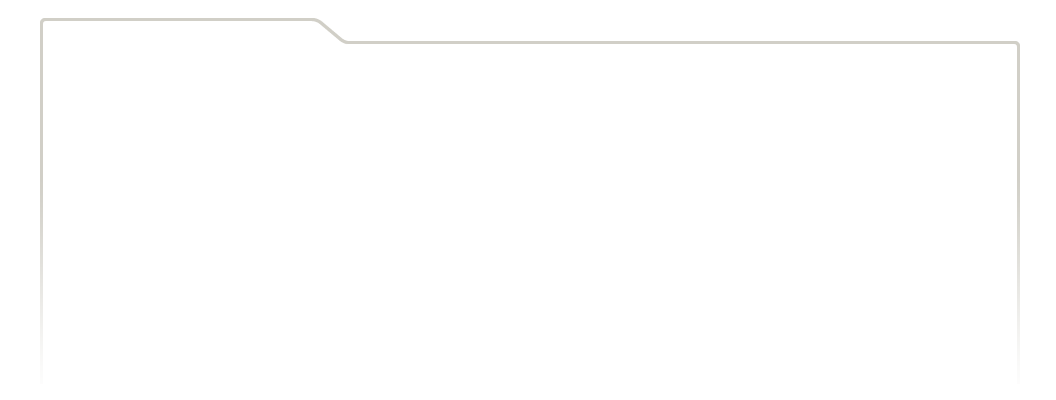
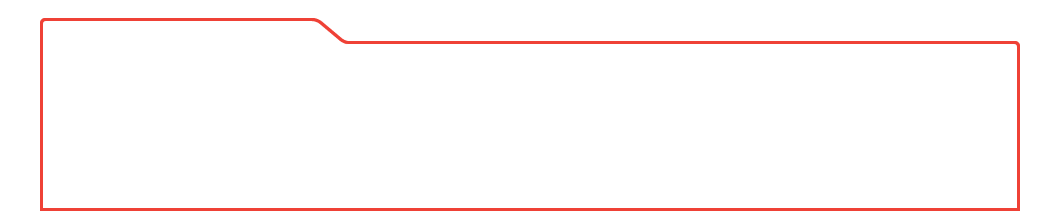
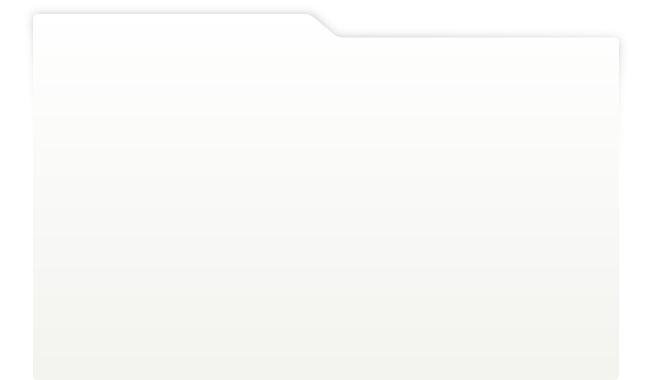
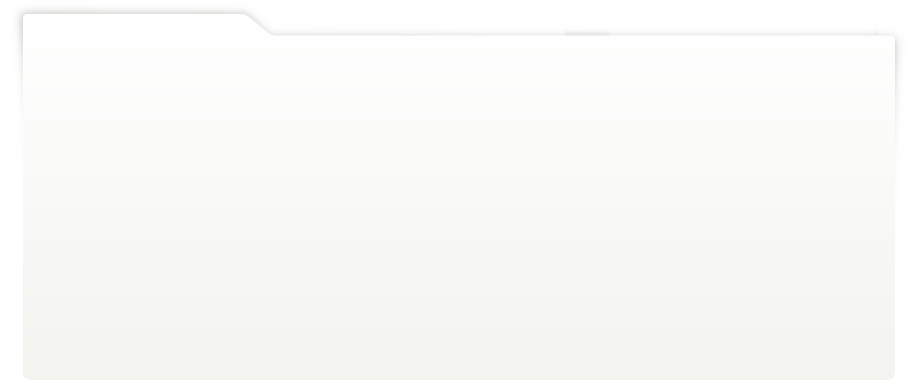
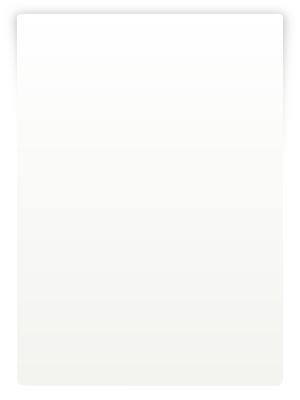
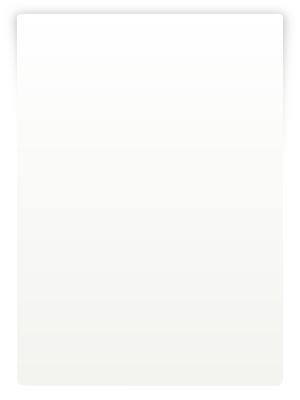
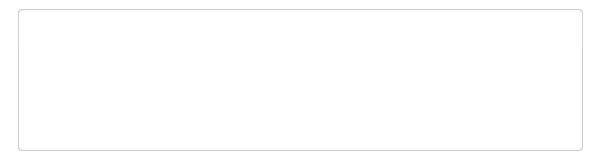
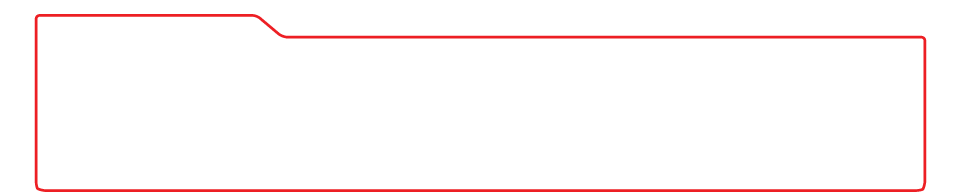
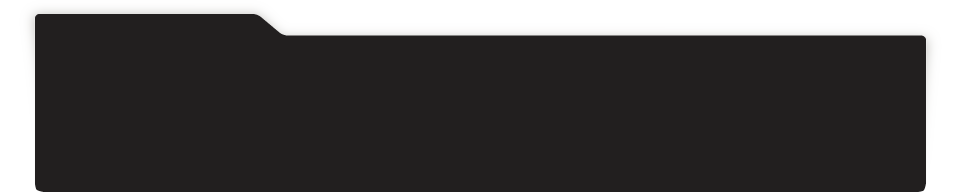
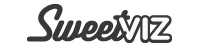
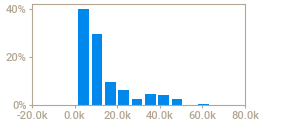
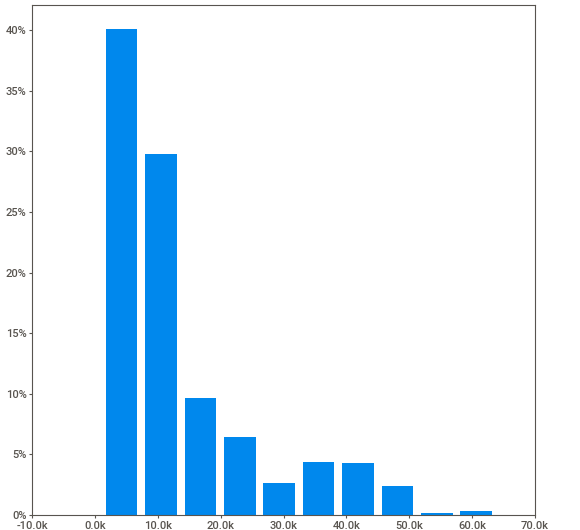
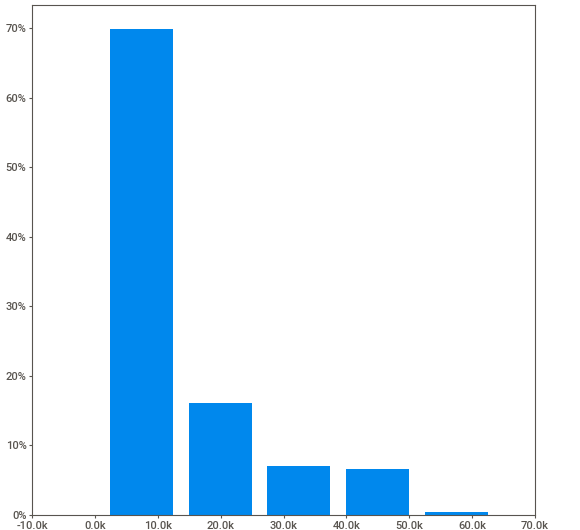
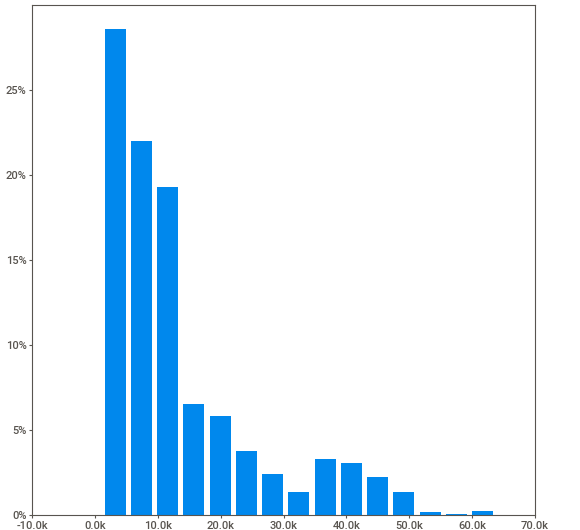
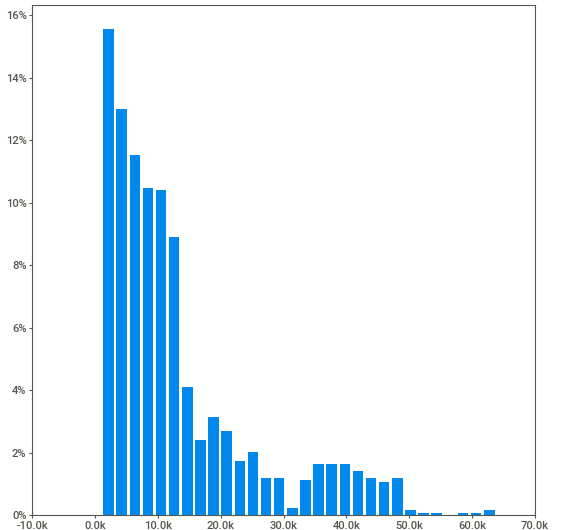
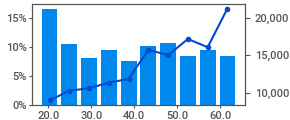
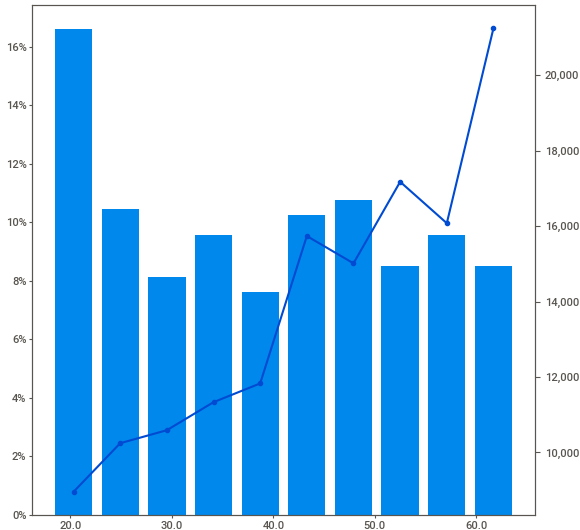
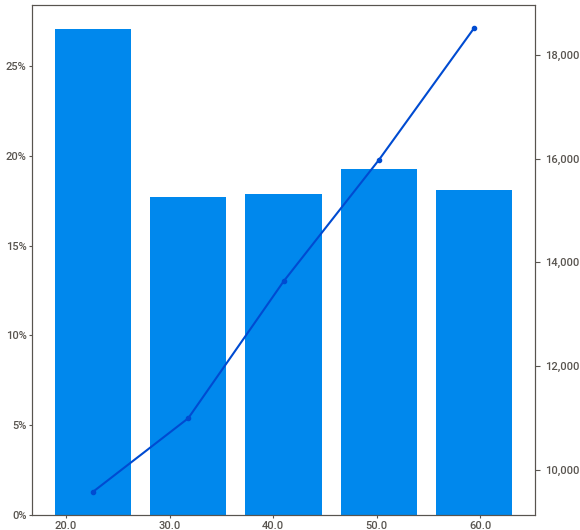
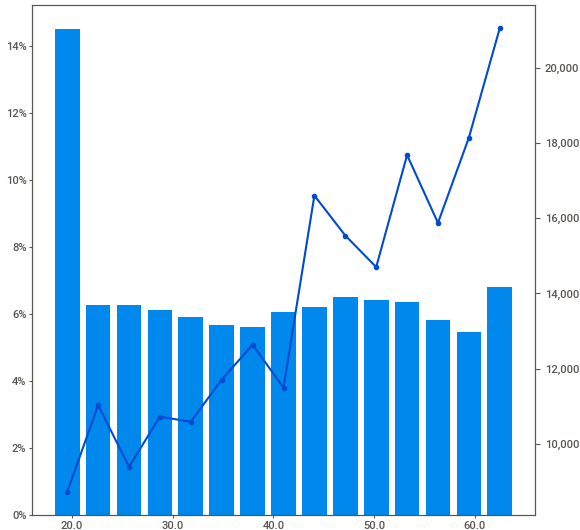
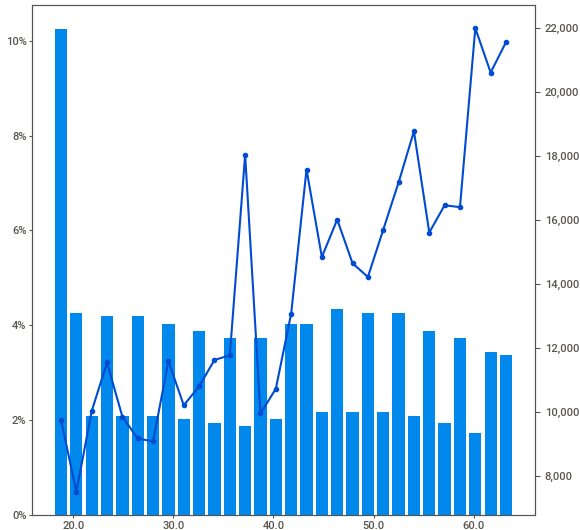
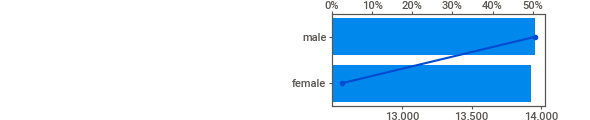
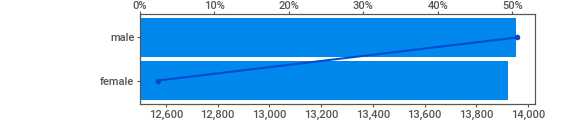
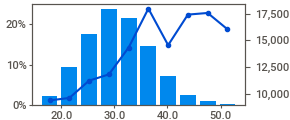
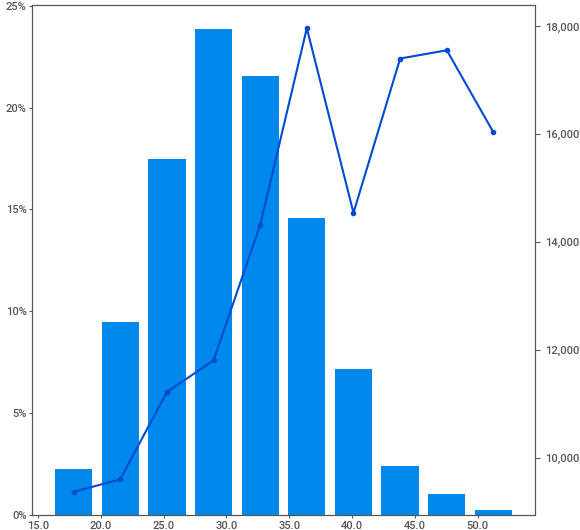
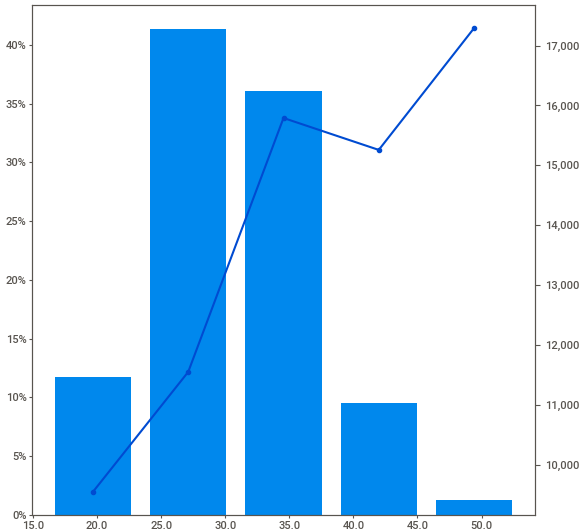
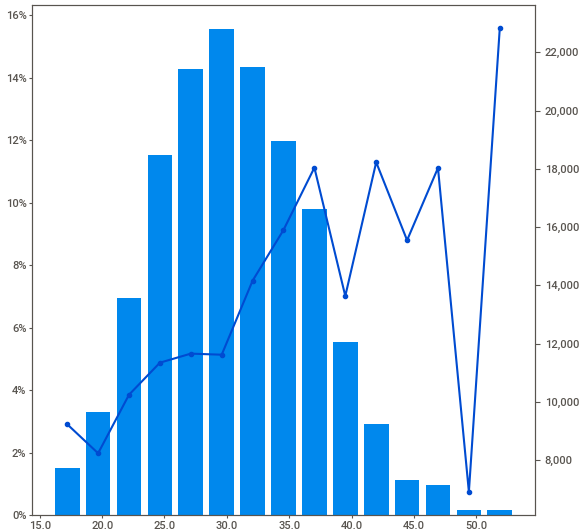
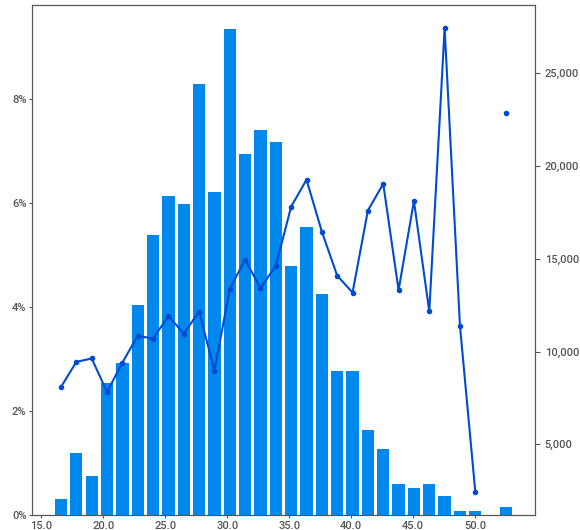
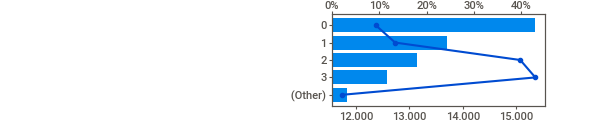
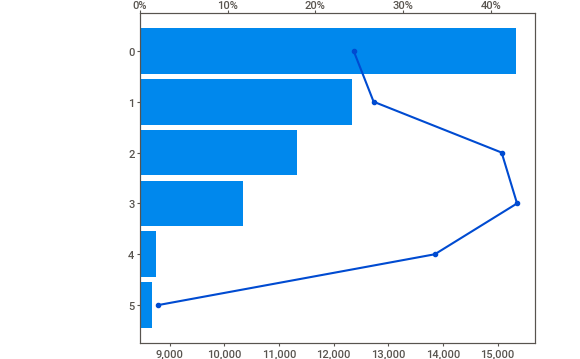
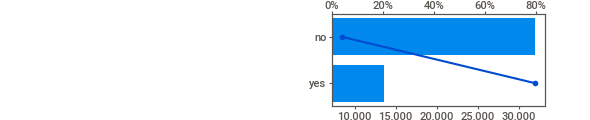
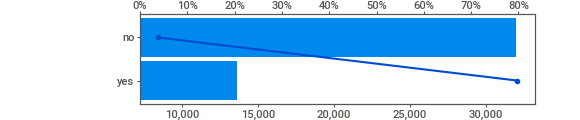
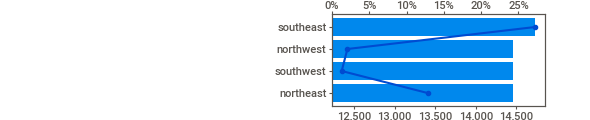
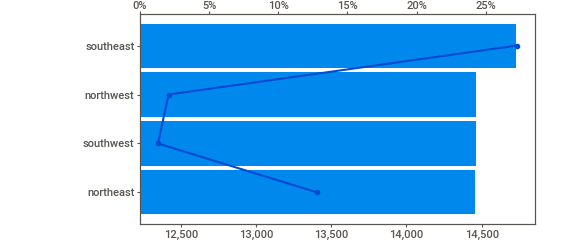
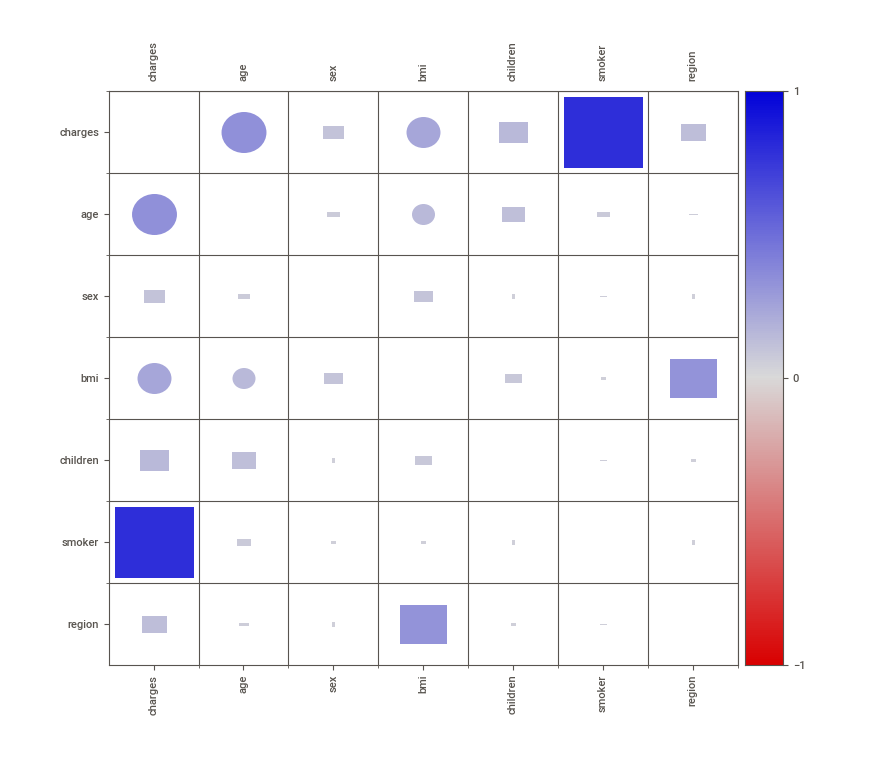
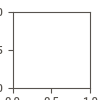

In [ ]:
#Mostrando a visualização de dados do sweetviz
eda.show_notebook()

Agora vamos utilizar a função compare_intra da biblioteca Sweetviz para analisar a variável gênero. O objetivo é analisar fumantes do gênero masculino e feminino.

In [ ]:
#Utilizando a função compare_intra
eda2 = sv.compare_intra(source_df = dados,
                              condition_series = dados['sex'] == 'male',
                              names = ['Masculino', 'Feminino'],
                              target_feat = 'smoker')

                                             |          | [  0%]   00:00 -> (? left)


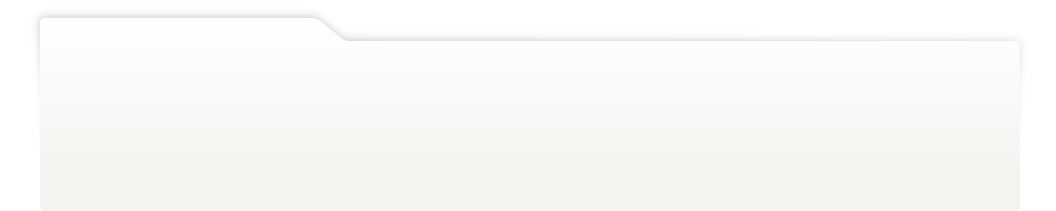
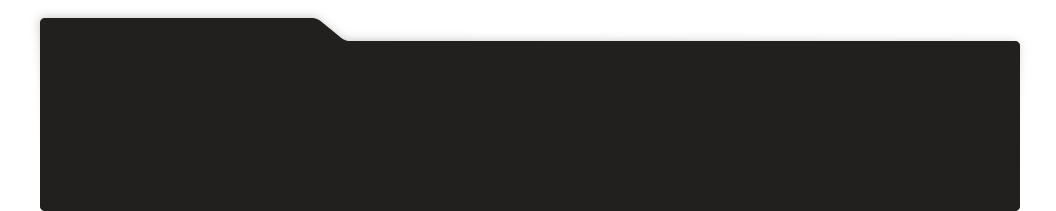
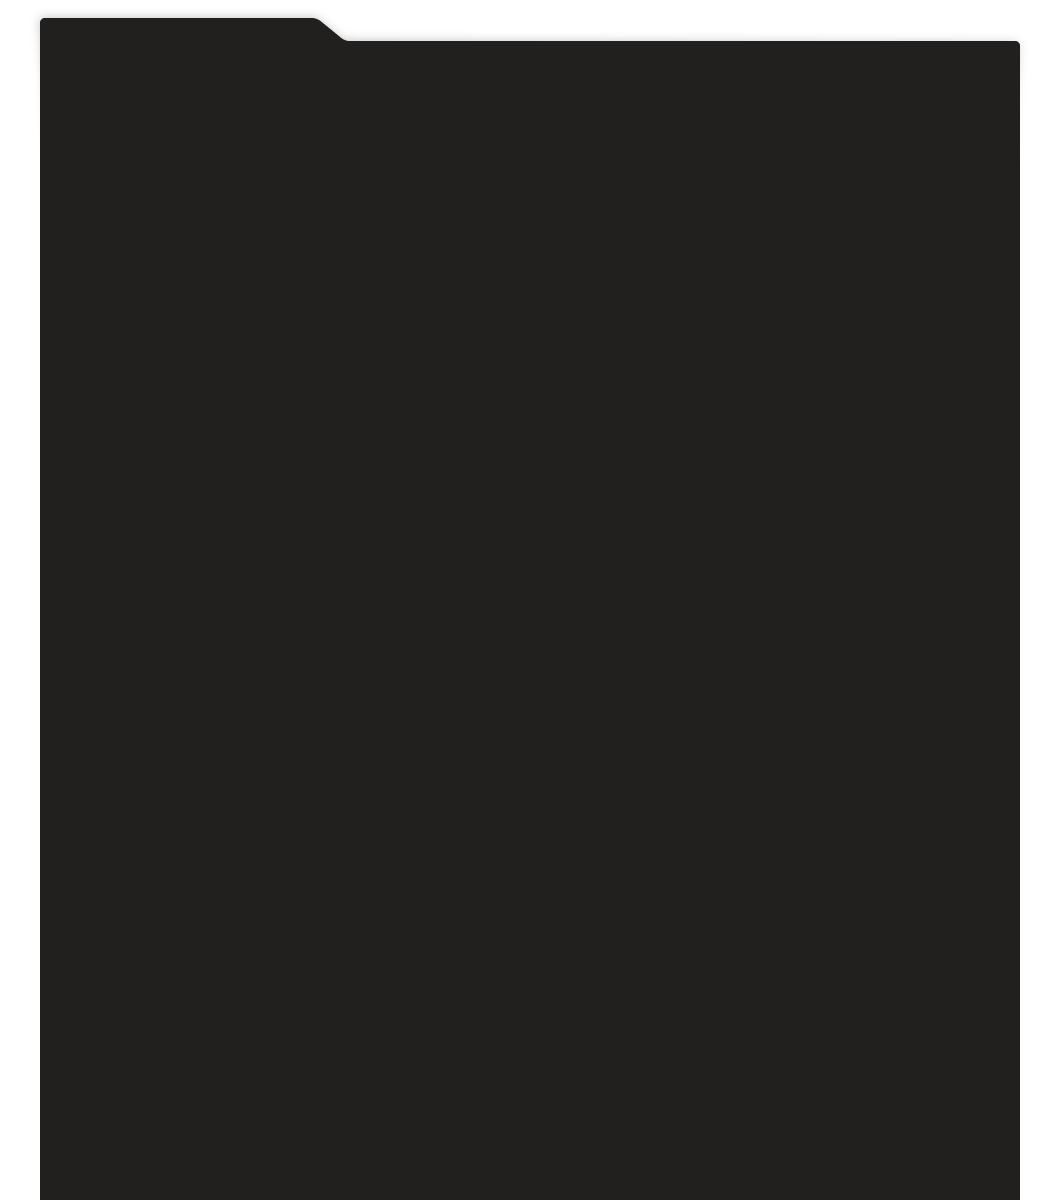
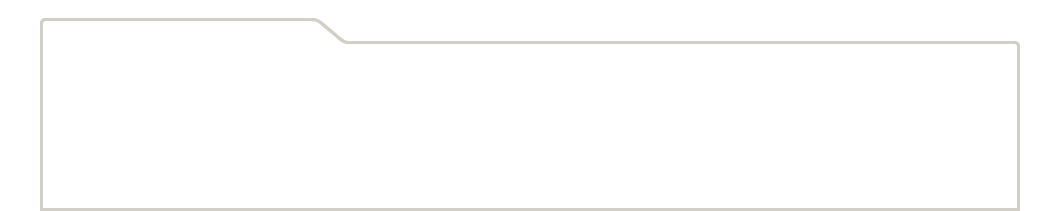
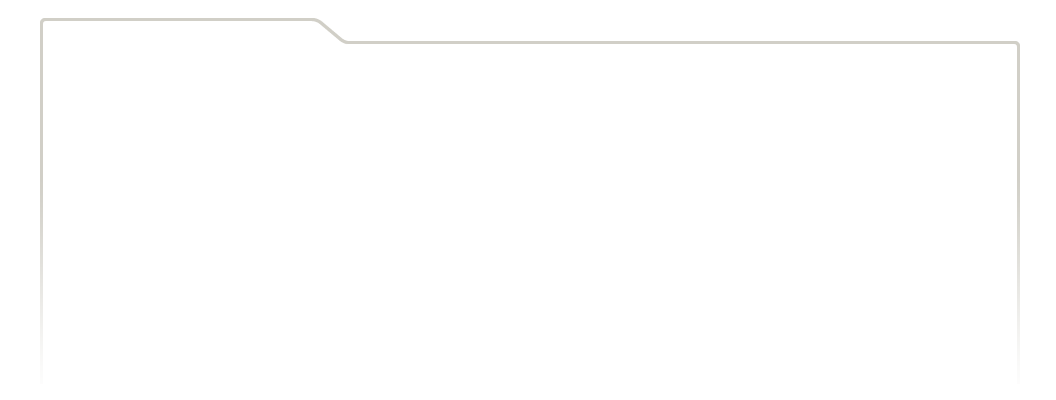
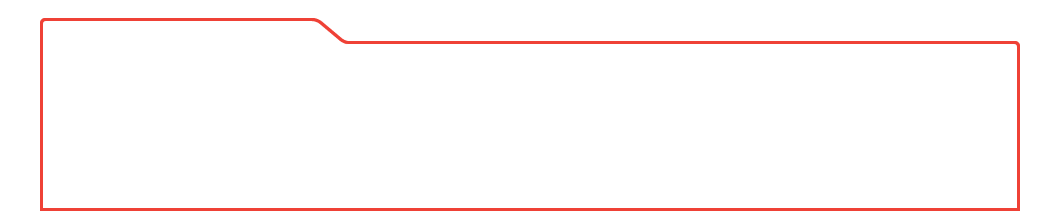
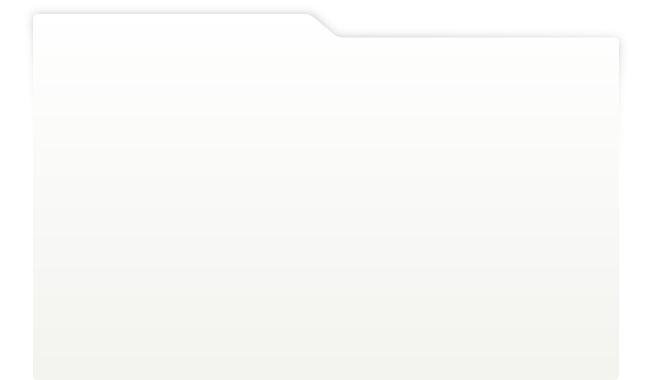
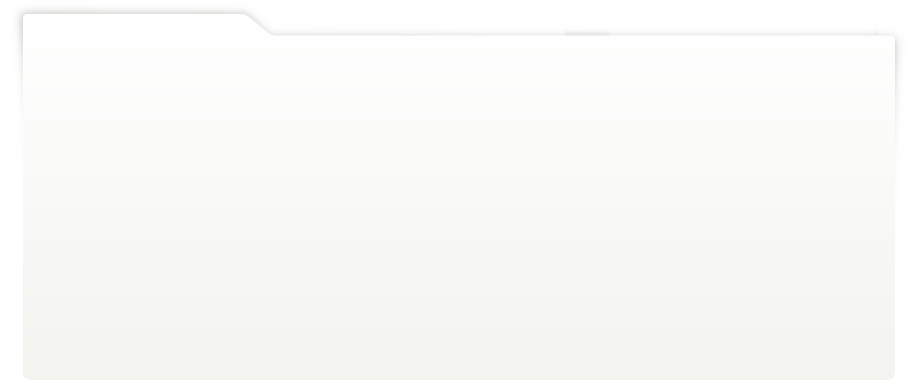
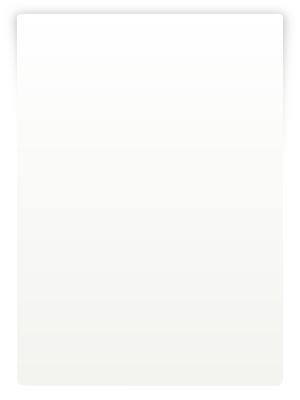
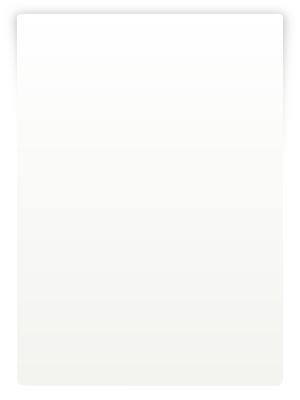
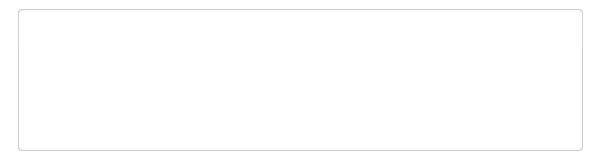
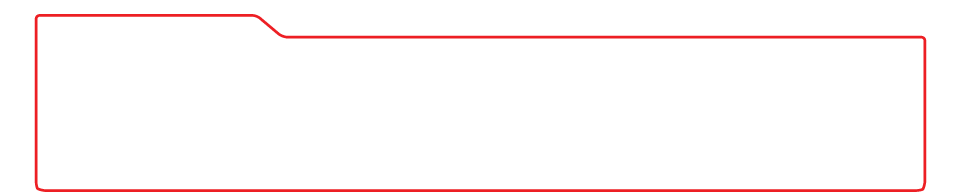
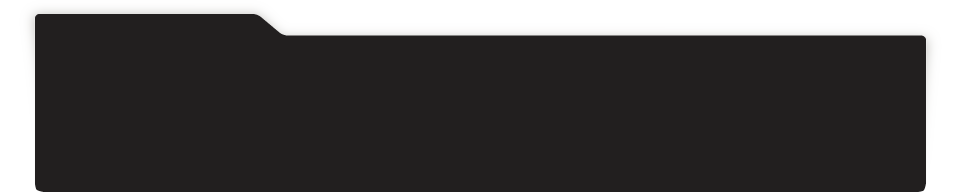
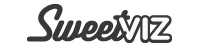
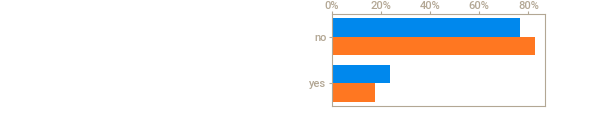
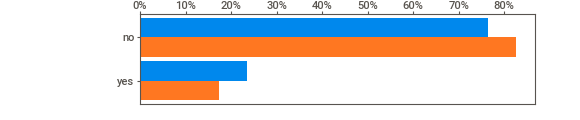
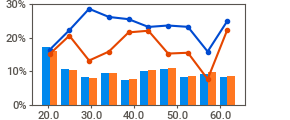
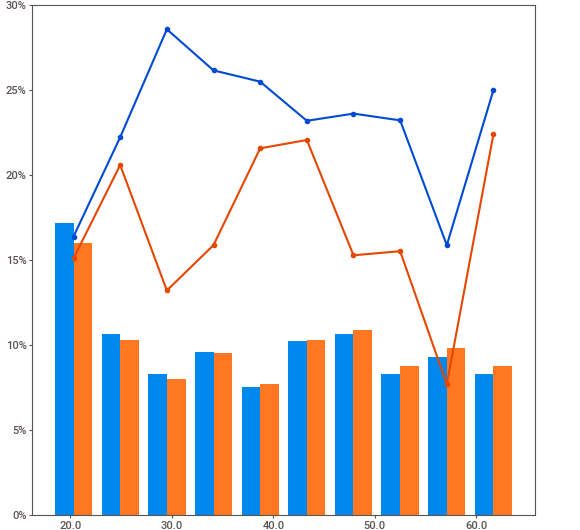
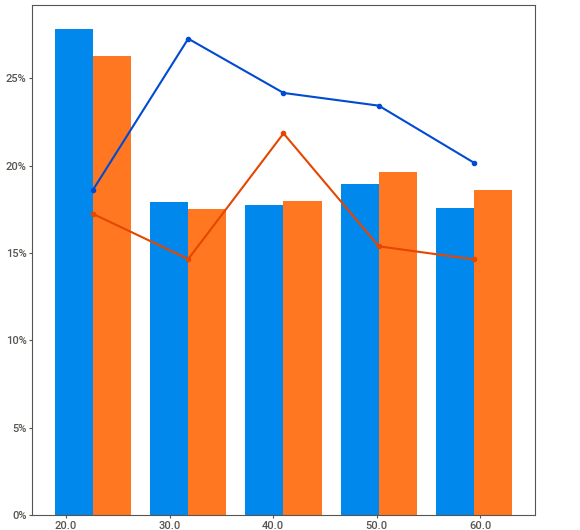
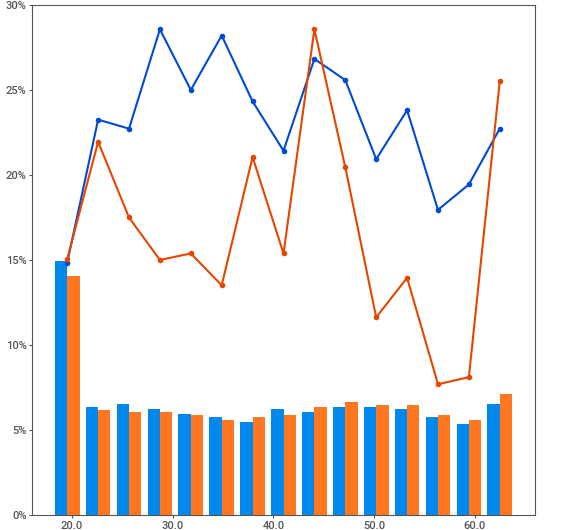
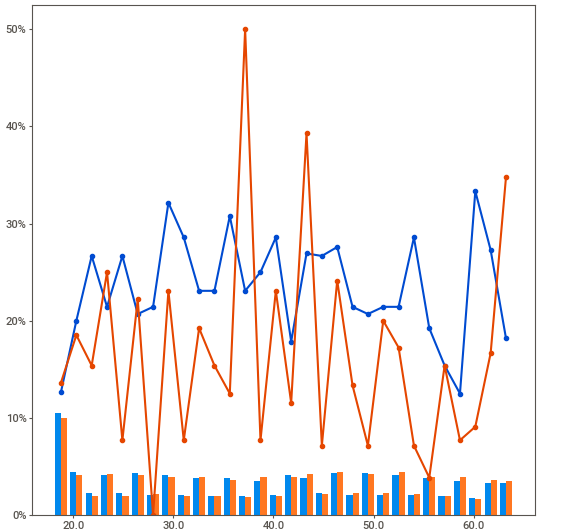
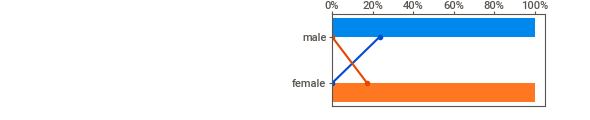
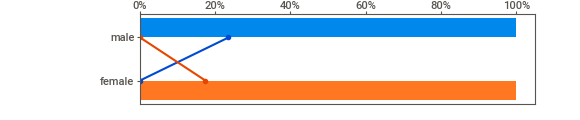
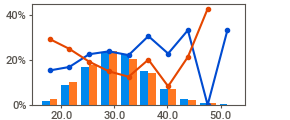
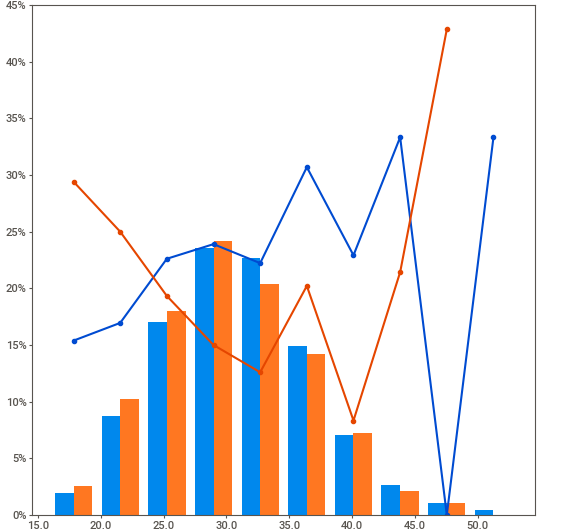
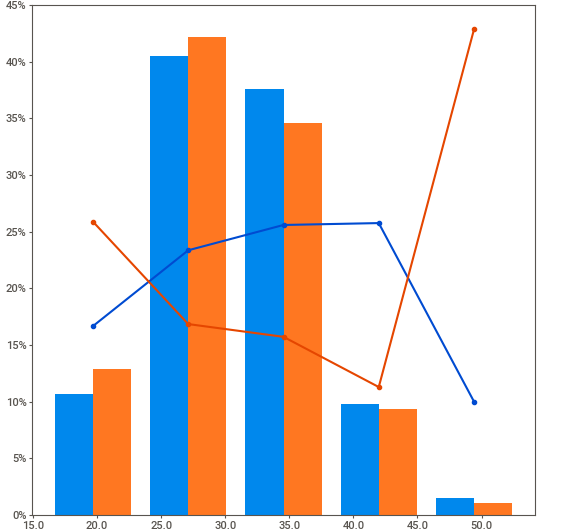
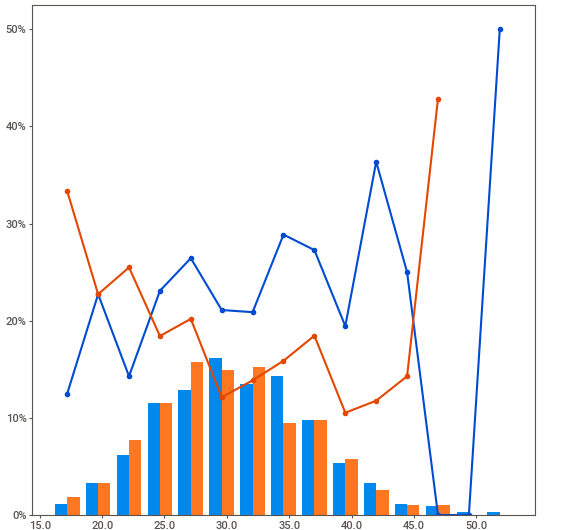
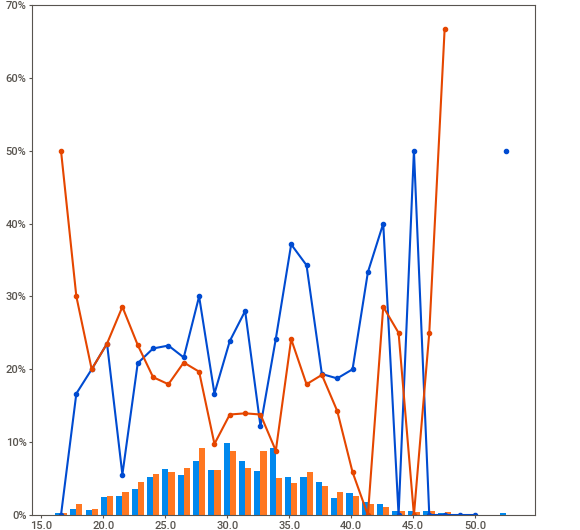
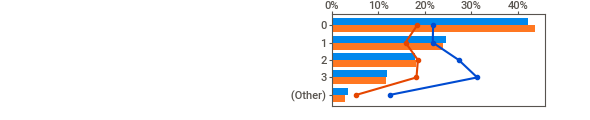
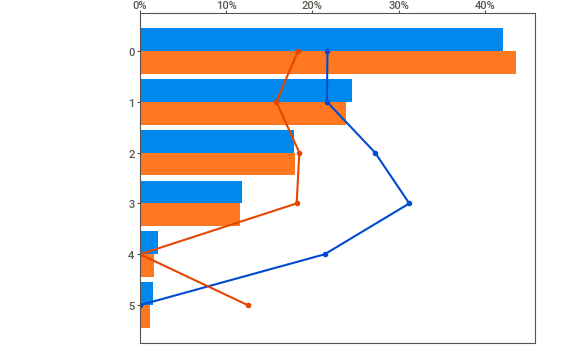
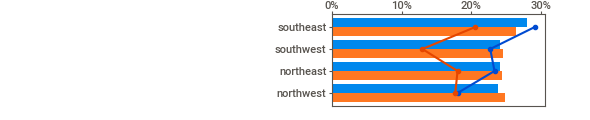
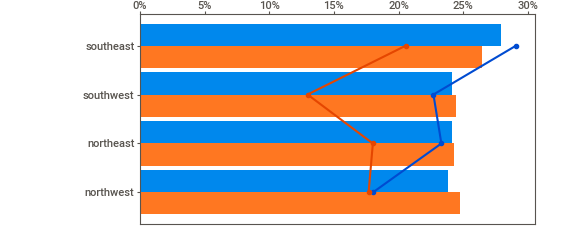
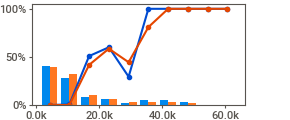
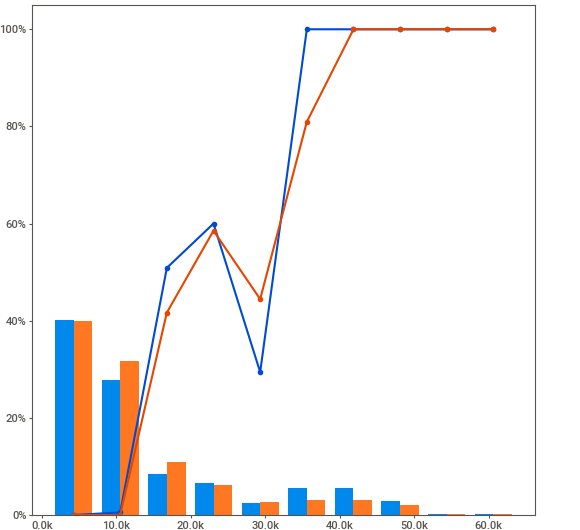
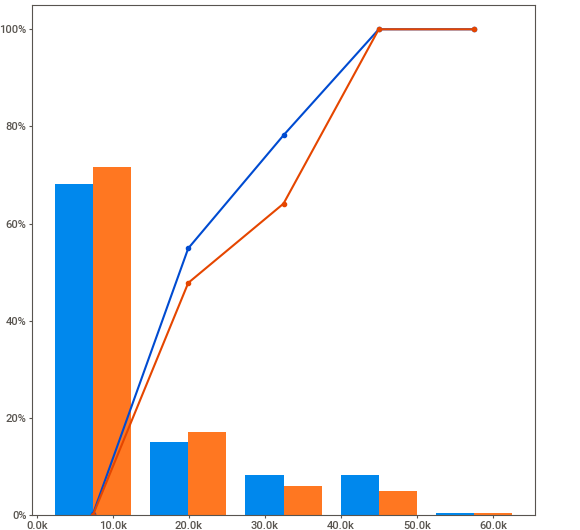
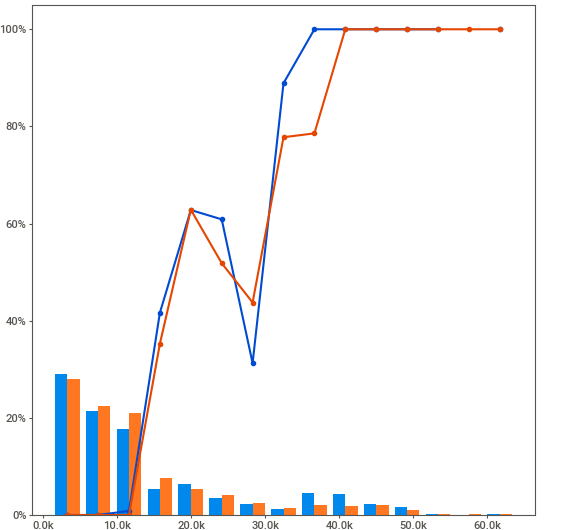
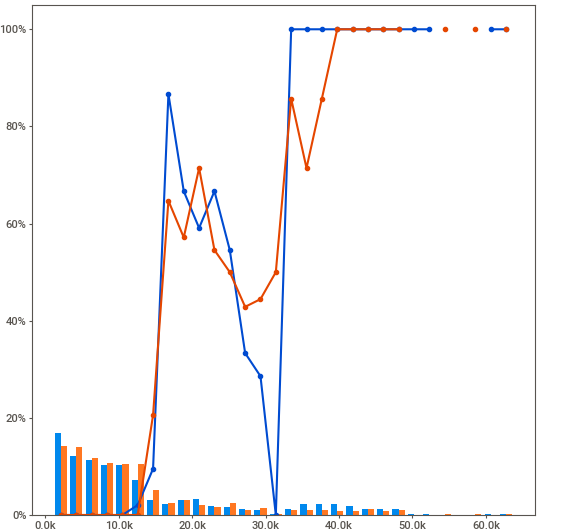
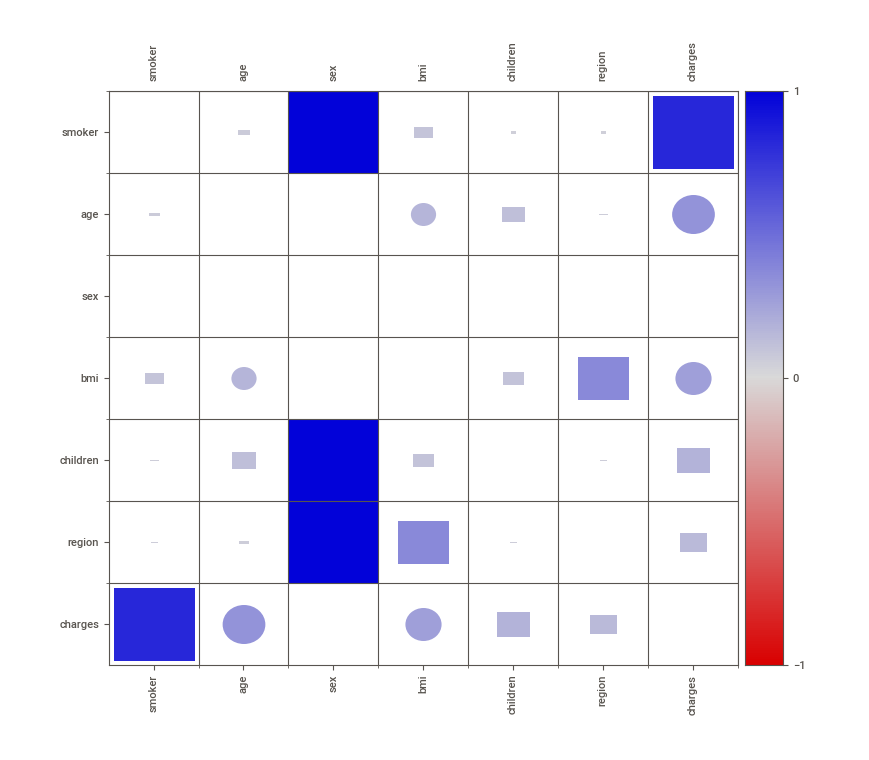
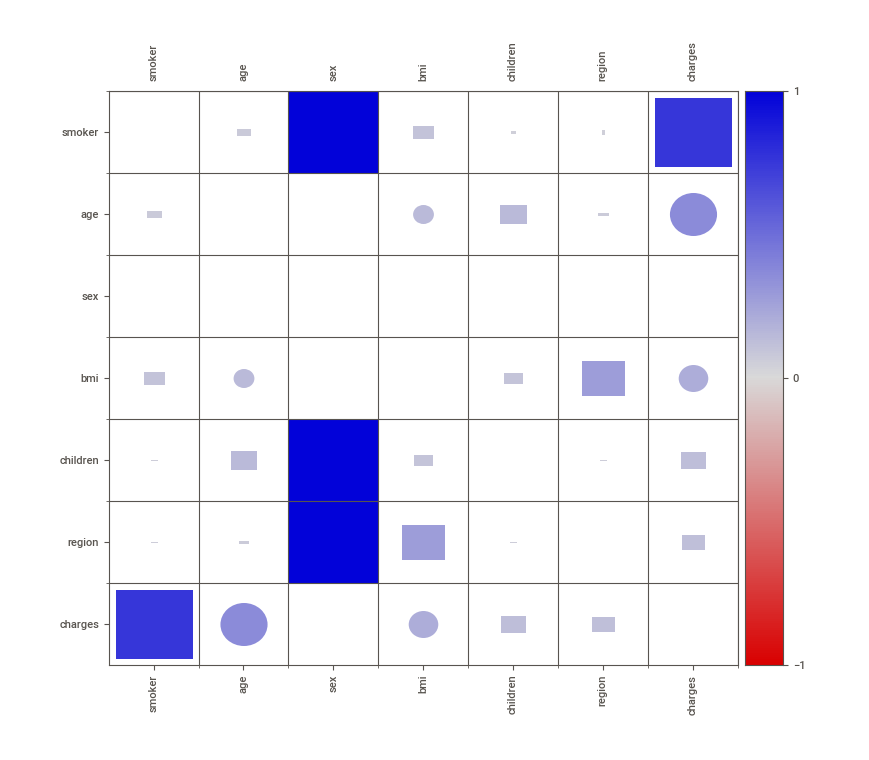

In [ ]:
#Mostrando a visualização de dados do sweetviz
eda2.show_notebook()

Com esta biblioteca, podemos tirar alguns insights dos gráficos gerados como valores mais frequentes e algumas medidas descritivas das variáveis numéricas.

##**Mise en place para Modelagem**

Em Machine Learning, em geral, todas as variáveis do conjunto de dados que será utilizado precisam ser númericas. É também interessante que o intervalo de variabilidade das variáveis contínuas não seja tão grande e esteja próximo de zero.

Por isso, vamos fazer as seguintes transformações:

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dólares

In [ ]:
#Colocando os dados da variável smoker em 0 (não fumante) e 1 (fumante)
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})

#Reescalonando a variável charges para uma escala menor: custos médicos individuais em 1000 dólares
dados['charges'] = dados['charges']/1000

Para esta análise, a princípio, vamos considerar as variáveis charges (custos individuais), bmi (IMC) e smoker (fumante).

In [ ]:
#Filtrando apenas as variáveis bmi, smoker e charges
dados = dados[['bmi', 'smoker', 'charges']]

#Mostrando as cinco primeiras linhas do conjunto de dados
dados.head()

bmi  smoker    charges
0  27.900       1  16.884924
1  33.770       0   1.725552
2  33.000       0   4.449462
3  22.705       0  21.984471
4  28.880       0   3.866855

Antes de prosseguir, vamos analisar dois pontos:

1. Estamos considerando estas três variáveis acima pois, podemos prever os custos usando o índice de massa corporal e fumantes. Assim, temos um problema de regressão linear porque prever os custos é prever uma variável numérica.

2. Se olharmos sob uma nova perspectiva deste mesmo conjunto, colocamos a variável resposta como smoker para prever quem é fumante ou não. As variáveis explicativas serão os custos e o índice de massa corporal. Assim, neste contexto, temos um problema de classificação já que a variável resposta é uma categoria.

Porém, neste projeto, vamos prever os custos e considerar a primeira problemática, utilizando um modelo de regressão linear.

##**Análise Entre Variáveis**

Aqui, vamos criar um gráfico de dispersão das variáveis IMC e custos em relação aos beneficiários do seguro de saúde que são fumantes ou não. 

- Smoker = 0 (não fumante)
- Smoker = 1 (fumante)

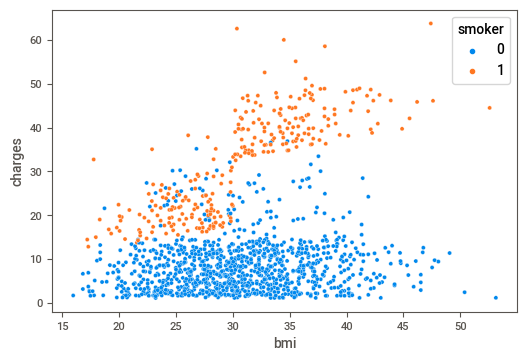

In [ ]:
#Criando um gráfico de dispersão usando a biblioteca seaborn
import seaborn as sns

#Plotando as variáveis x = IMC e y = custos no gráfico em relação a fumantes
#hue = smoker onde fumantes é a variável categórica de agrupamento que plotará pontos no gráfico em cores diferentes
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

Como estamos estudando um modelo de regressão linear, este tentará traçar uma reta para ajustar os dados. 

Podemos observar pelo gráfico acima que este não é o melhor ajuste, mesmo observando uma certa tendência de linearidade, principalmente nos pontos laranjas (fumantes) em relação aos pontos azuis (não fumantes).

Se plotarmos o mesmo gráfico desta vez sem destacar a variável fumantes, teremos o seguinte:

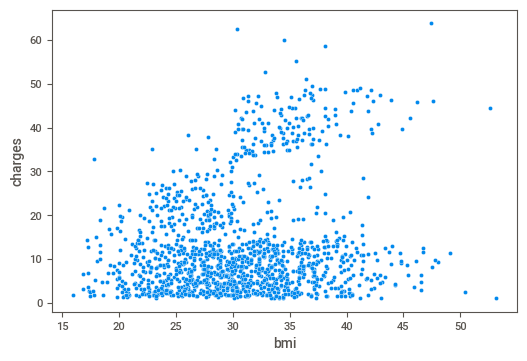

In [ ]:
#Gráfico sem destacar a variável fumantes. Para isso, usamos # na segunda linha de código

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
#sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

No gráfico de dispersão acima, estamos visualizando apenas o Índice de Massa Corporal e os custos médicos individuais, sem levar em consideração quem é fumante ou não.
Aqui, vamos utilizar o modelo de regressão linear para prever os custos utilizando apenas o IMC.

##**Modelo de Machine Learning Supervisionado**

###**Regressão Linear**

In [ ]:
#Importando a biblioteca sklearn para usar a função LinearRegression
from sklearn.linear_model import LinearRegression

#Modelo para prever a variável custos utilizando apenas o IMC
#X é a variável explicativa em DataFrame e y é a variável resposta em Series

X = dados[['bmi']]
y = dados['charges']

#Primeiro definimos o objeto como sendo o modelo e depois ajustamos
regressao = LinearRegression()
regressao.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Desta forma, o modelo de regressão linear é dado por:

**CUSTOS = b0 + b1 * IMC** 

onde vamos encontrar os coeficientes b0 e b1 quando ajustamos o objeto na função acima.

###**Coeficientes b0 e b1**

In [ ]:
#Mostrando os coeficientes ajustados
print('b0 = ', regressao.intercept_)
print('b1 = ', regressao.coef_ [0] )

b0 =  1.1929372089611512
b1 =  0.3938730307973951


###**Predição de Dados Novos**

Vamos usar este modelo de regressão linear na prática para fazer predição de dados novos. 

Considerando os IMC nos valores de 15, 22, 28 e 33 para estimar os custos médicos individuais.

In [ ]:
#Usando o modelo de regressão linear na prática
novos_dados = pd.DataFrame({'bmi': [15, 22, 28, 33]})
regressao.predict(novos_dados)

array([ 7.10103267,  9.85814389, 12.22138207, 14.19074723])

Podemos observar que os custos estimados para uma pessoa com Índice de Massa Corporal igual a: 

- IMC = 15 a previsão de custos é de 7.101,00 dólares

- IMC = 22 a previsão de custos é de 9.858,00 dólares

- IMC = 28 a previsão de custos é de 12.221,00 dólares

- IMC = 33 a previsão de custos é de 14.191,00 dólares

###**Ajustando o Modelo**

Vamos fazer o gráfico do ajuste para este modelo de regressão linear.

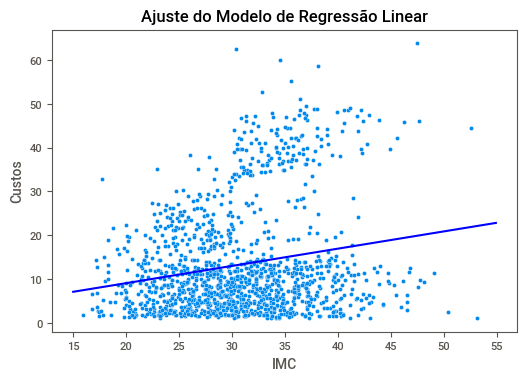

In [ ]:
#Fazendo o gráfico do ajuste
b0 = regressao.intercept_
b1 = regressao.coef_

#Importando a biblioteca numpy onde a função arrange é usada gerar os pontos em um intervalo para plotar a reta no gráfico
import numpy as np
pontos_em_x = np.arange(15, 55, 0.1)
pontos_em_y = b0 + b1 * pontos_em_x

#Plotando os pontos no gráfico
sns.scatterplot(x = 'bmi', y = 'charges', data = dados)

#Importando a bilioteca matplotlib para gerar a reta azul no gráfico
import matplotlib.pyplot as plt
plt.plot(pontos_em_x, pontos_em_y, color = 'blue')

#Gerando o título e as labels para os eixos x e y
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custos')

#Mostrar o gráfico
plt.show()

Este não é um bom modelo, pois os pontos estão muito dispersos da reta. Talvez uma reta não seja o melhor ajuste para este gráfico. Vamos verificar a qualidade do ajuste do modelo na etapa a seguir.

##**Métrica para Avaliação do Modelo**

###**Erro Quadrático Médio (EQM)**

O Erro Quadrático Médio é uma métrica usada para medir a qualidade do ajuste do modelo antes de colocá-lo em operação. Assim, podemos verificar o quanto o modelo está errando em sua previsão. No caso deste projeto, o quanto está errando na previsão dos custos médicos de cada beneficiário do seguro de saúde.

A seguir, vamos calcular o EQM para o modelo anteriormente ajustado.

In [ ]:
#Predizendo os valores no conjunto de treino
preditos = regressao.predict(X)

#Calculando o EQM onde y é o real e preditos são os custos que o modelo está prevendo
eqm = ((y - preditos)**2).mean()

#Também podemos calcular o EQM usando a biblioteca sklearn com a função mean_squared_error
from sklearn.metrics import mean_squared_error 
eqm = mean_squared_error(y, preditos)

print('EQM da Regressão Linear: {}'.format(round(eqm, 2)))

EQM da Regressão Linear: 140.82


Não podemos considerar que este valor de EQM representa o erro do ajuste do modelo pois, para medir o desempenho do mesmo, precisamos de um método de validação. 

Assim, vamos utilizar a técnica HoldOut onde vamos separar, aleatoriamente, o conjunto de dados em treino (treinar o modelo) e teste (avaliar o desempenho do modelo).

##**Estratégia de Validação do Modelo**

###**Técnica HoldOut**

In [ ]:
#Importando a biblioteca scikit-learn onde a função train_test_split separa os dados em teste e treinamento
from sklearn.model_selection import train_test_split

Em sequência, vamos dividir todo o conjunto de dados em treino e teste. Do total, 25% dos dados serão usados para teste e 75% para treinamento.

Vamos fazer o ajuste do modelo utilizando os dados de treino (Xtreino e ytreino) e avaliar o modelo ajustado nos dados de teste (Xteste e yteste). Desta forma, o EQM será calculado apenas nos dados de teste.


In [ ]:
#Dividindo os dados em teste e treinamento 
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

#Ajustando o modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)

#Utilizando o modelo ajustado para predizer os dados de TESTE
preditos = regressao.predict(Xteste) 

#Calculando o Erro Quadrático Médio nos dados de TESTE
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 117.23


Quando separamos em dados de treino e teste acima, não definimos nenhum parâmetro para fixar quais valores irão para treinamento e quais irão para teste. Assim, a tendência do valor do EQM é ter uma certa instabilidade. 

Podemos observar que, no primeiro cálculo de EQM antes de aplicar um método de avaliação do modelo, obtemos um valor de 140,82. Após a aplicação da técnica HoldOut, obtivemos um EQM de 117,23. Este último valor irá variar independente da quantidade de vezes que executarmos a linha de código para o cálculo do EQM nos dados de teste. Então, há incerteza no valor gerado.

In [ ]:
#Mostrando quantidade de dados de treino e teste
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


##**Alimentando o Modelo com Mais Informações**

Anteriormente, usamos o IMC para prever os custos médicos individuais. Agora, vamos inserir mais informações no modelo e considerar as variáveis IMC e fumantes para prever a variável custos.

Neste cenário, o modelo de regressão linear é dado por:

**CUSTOS = b0 + b1 * IMC + b2 * FUMANTE**

onde vamos encontrar os coeficientes b0, b1 e b2 quando ajustamos o objeto na função acima.

In [ ]:
#Considerando o modelo com duas variáveis preditoras
X = dados[['bmi', 'smoker']]
y = dados['charges']

###**Repetindo o Procedimento de Validação Holdout**

In [ ]:
#Dividindo os dados em teste e treinamento
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

#Ajustando o modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)

#Utilizando o modelo ajustado para predizer os dados de TESTE
preditos = regressao.predict(Xteste)

#Calculando o Erro Quadrático Médio nos dados de TESTE
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 48.62


Ao recalcularmos o EQM nos dados de teste, aplicando a técnica HoldOut com mais informações no modelo e executando as linhas de código algumas vezes, obtivemos os valores 52,37, 59,23, 48,62... 

Podemos observar que, mesmo com a variabilidade dos valores, esta instabilidade é baixa e, podemos constatar que este modelo é melhor que o anterior.
Ou seja, quando alimentamos o modelo com mais informações, temos um ganho de performance.

###**Coeficientes b0, b1 e b2**

In [ ]:
#Coeficientes ajustados
b0 = regressao.intercept_
b1, b2 = regressao.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)

b0 =  -4.327252403861237
b1 =  0.41981500744634526
b2 =  23.433263814152326


###**Gráfico do Ajuste com Duas Variáveis**

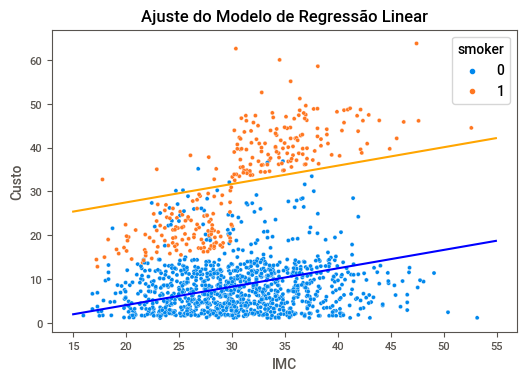

In [ ]:
#Gerando intervalo dos valores do eixo x
x = np.arange(15, 55, 0.1)

#Reta para variável fumantes = 0 (não)
y0 = b0 + b1*x + b2*0

#Reta para variável fumantes = 1 (sim)
y1 = b0 + b1*x + b2*1

#Plotando os pontos no gráfico
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)

#Gerando as retas laranja e azul no gráfico
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')

#Gerando o título e as labels para os eixos x e y
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custo')

#Mostrar o gráfico
plt.show()

No gráfico acima, podemos observar que o ajuste deste modelo é um pouco superior ao modelo ajustado apenas por uma reta.

A nuvem de pontos azuis (não fumantes) é ajustada pela reta azul e a nuvem de pontos laranjas (fumantes) é ajustada pela reta laranja.

A representação numérica do ajuste deste último modelo é dado pelo valor do EQM onde repetimos o procedimento da validação HoldOut: 48,62. Não podemos nos esquecer que este Erro Quadrático Médio possui variabilidade, ainda que menor ao EQM do primeiro modelo ajustado.

##**É Possível um Valor Mais Confiável do EQM?**

Uma forma de obter um valor mais estável para o Erro Quadrático Médio é rodar a técnica HoldOut diversas vezes, variando os dados do conjunto de teste e treino e tirar uma média simples dos valores de EQM encontrados em cada repetição. 

Esta prática é uma forma de diminuir a influência de aleatoriedades nas posições dos dados de treinamento e teste.

Considerando o mesmo modelo de regressão linear dado anteriormente:

**CUSTOS = b0 + b1 * IMC + b2 * FUMANTE**

onde vamos encontrar os coeficientes b0, b1 e b2 quando ajustamos o objeto na função acima.

In [ ]:
#Considerando o modelo com duas variáveis preditoras
X = dados[['bmi', 'smoker']]
y = dados['charges']

###**Repetindo o Procedimento de Validação HoldOut**

In [ ]:
#Dividindo os dados em teste e treinamento
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

#Ajustando o modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)

#Utilizando o modelo ajustado para predizer os dados de TESTE
preditos = regressao.predict(Xteste)

#Calculando o Erro Quadrático Médio nos dados de TESTE
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 55.11


###**Coeficientes b0, b1 e b2**

In [ ]:
#Coeficientes ajustados
b0 = regressao.intercept_
b1, b2 = regressao.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)

b0 =  -2.9302874646849126
b1 =  0.3741238013692868
b2 =  23.372908221978484


Fazendo 100 repetições da técnica HoldOut, temos:

In [ ]:
#Número de repetições
Rep = 100

#EQM médio
eqm_mean = []

for i in range(Rep):

  #Dividindo os dados em teste e treinamento
  Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

  #Ajustando o modelo nos dados de TREINO
  regressao = LinearRegression()
  regressao.fit(Xtreino, ytreino)

  #Utilizando o modelo ajustado para predizer os dados de TESTE
  preditos = regressao.predict(Xteste)

  #Calculando o Erro Quadrático Médio nos dados de TESTE
  eqm = mean_squared_error(yteste, preditos)
  eqm_mean.append(eqm)
  print('EQM : {}'.format(round(eqm, 2))) 

EQM : 46.44
EQM : 44.77
EQM : 52.77
EQM : 53.03
EQM : 53.01
EQM : 49.87
EQM : 54.13
EQM : 47.1
EQM : 47.06
EQM : 49.58
EQM : 43.39
EQM : 50.6
EQM : 51.67
EQM : 58.09
EQM : 49.32
EQM : 56.07
EQM : 48.68
EQM : 47.73
EQM : 43.88
EQM : 46.62
EQM : 46.79
EQM : 47.64
EQM : 51.27
EQM : 52.37
EQM : 54.76
EQM : 49.81
EQM : 50.21
EQM : 47.54
EQM : 50.73
EQM : 46.0
EQM : 60.91
EQM : 56.26
EQM : 48.84
EQM : 40.23
EQM : 52.68
EQM : 45.13
EQM : 53.42
EQM : 53.15
EQM : 53.61
EQM : 47.78
EQM : 44.3
EQM : 44.41
EQM : 47.89
EQM : 53.15
EQM : 53.55
EQM : 44.76
EQM : 51.11
EQM : 44.27
EQM : 53.6
EQM : 58.15
EQM : 43.84
EQM : 45.01
EQM : 57.71
EQM : 51.29
EQM : 46.04
EQM : 48.28
EQM : 52.02
EQM : 44.55
EQM : 55.71
EQM : 54.94
EQM : 49.95
EQM : 44.36
EQM : 50.96
EQM : 62.05
EQM : 49.53
EQM : 51.01
EQM : 41.21
EQM : 44.27
EQM : 46.14
EQM : 46.54
EQM : 45.28
EQM : 48.32
EQM : 45.79
EQM : 56.58
EQM : 51.9
EQM : 57.5
EQM : 44.67
EQM : 49.68
EQM : 47.9
EQM : 52.92
EQM : 51.3
EQM : 52.67
EQM : 58.66
EQM : 48.0
EQ

In [ ]:
print('O valor médio do EQM é:', round(np.mean(eqm_mean), 2))

O valor médio do EQM é: 50.09


Encontramos um valor médio do EQM de 50,09 após rodar a técnica HoldOut 100 vezes. Um valor menor em relação ao EQM anterior de 55,11, porém apresentando variabilidade.

Vale frisar que, para esta esta técnica, é importante uma quantidade suficiente de dados para dividir em grupos de treino e teste a fim de ter menos variabilidade do EQM e gerar modelos melhores ajustados.